# Import Packages

In [5]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm

In [7]:
class_names = ['Doubtful','healthy knee', 'Minimal','moderate','severe']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (64, 64)

# Loading the Data
We have to write a load_data function that load the images and the labels from the folder.

In [18]:
def load_data():

    datasets = [r'C:\Users\ABHISHEK\Music\bone cancer (1)\bone cancer\train', r'C:\Users\ABHISHEK\Music\bone cancer (1)\bone cancer\test']

    output = []

    # Iterate through training and test sets
    for dataset in datasets:

        images = []
        labels = []

        print("Loading {}".format(dataset))

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]

            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')

        output.append((images, labels))

    return output

In [20]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading C:\Users\ABHISHEK\Music\bone cancer (1)\bone cancer\train


100%|██████████| 130/130 [00:02<00:00, 59.04it/s]


Loading C:\Users\ABHISHEK\Music\bone cancer (1)\bone cancer\test


100%|██████████| 40/40 [00:00<00:00, 58.86it/s]


In [22]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [24]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 5735
Number of testing examples: 520
Each image is of size: (64, 64)


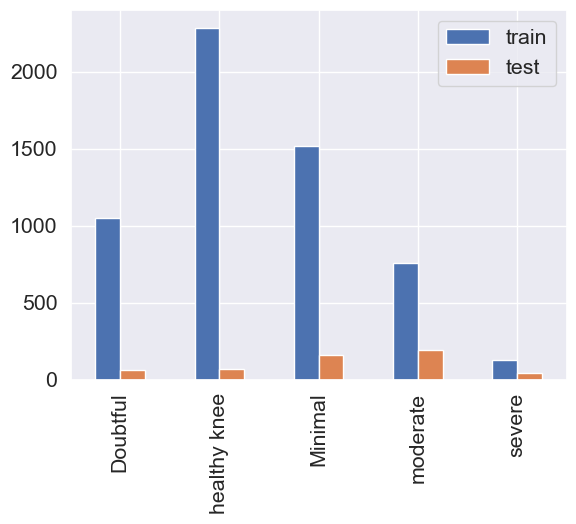

In [26]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts},
             index=class_names
            ).plot.bar()
plt.show()

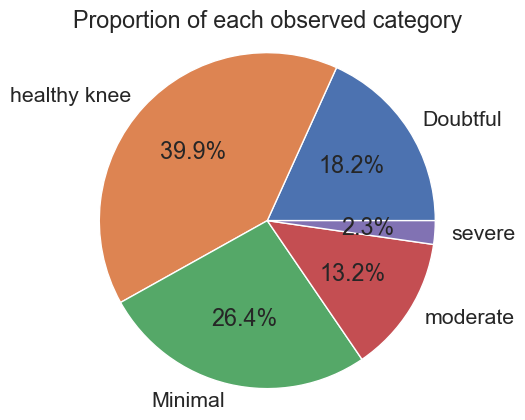

In [28]:
plt.pie(train_counts,
        explode=(0,0,0,0,0) ,
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

## Good practice: scale the data

In [31]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Visualize the data
We can display a random image from the training set.

In [34]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """

    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

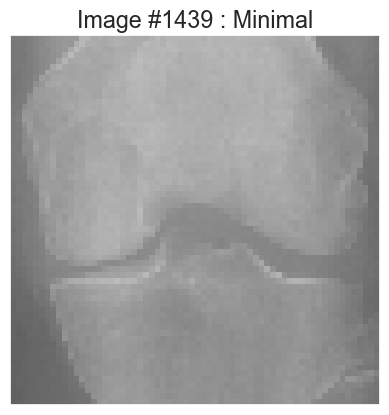

In [36]:
display_random_image(class_names, train_images, train_labels)

In [38]:
import matplotlib.pyplot as plt

def display_examples(class_names, images, labels):
    """
    Display 25 images from the images array with its corresponding labels
    """
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()


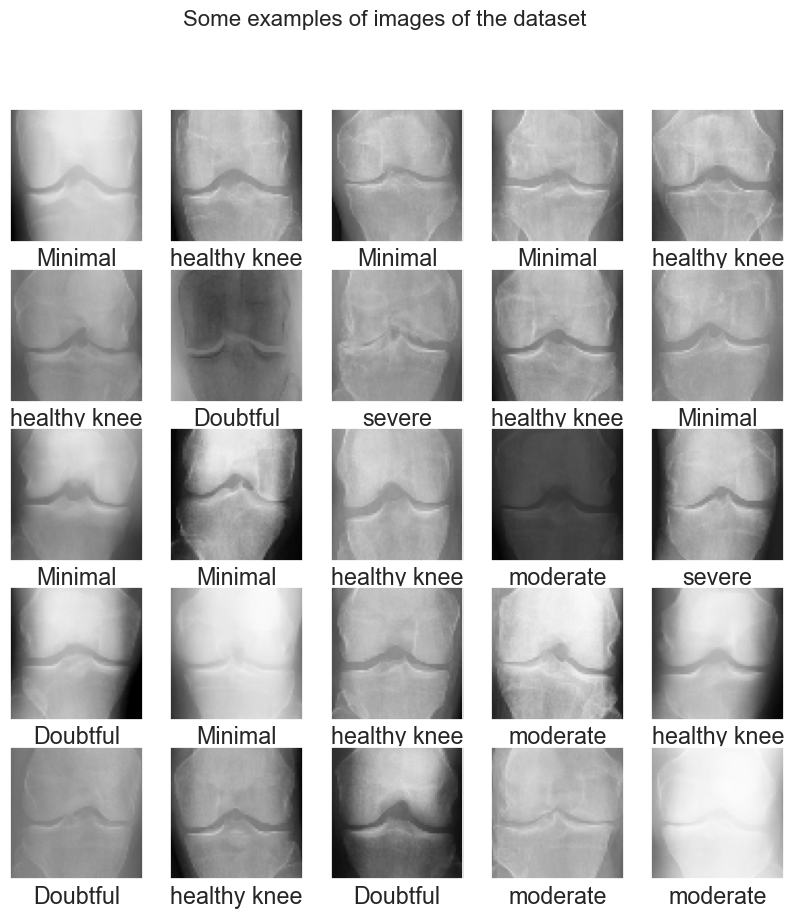

In [40]:
display_examples(class_names, train_images, train_labels)

# CNN

In [45]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (64, 64,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(5, activation=tf.nn.softmax)
])

In [47]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [49]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=60, validation_split = 0.2)

Epoch 1/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 179ms/step - accuracy: 0.3477 - loss: 1.6144 - val_accuracy: 0.3906 - val_loss: 1.4044
Epoch 2/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 165ms/step - accuracy: 0.4052 - loss: 1.3820 - val_accuracy: 0.3906 - val_loss: 1.3957
Epoch 3/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 167ms/step - accuracy: 0.3965 - loss: 1.3931 - val_accuracy: 0.3915 - val_loss: 1.3829
Epoch 4/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 171ms/step - accuracy: 0.3994 - loss: 1.3777 - val_accuracy: 0.3906 - val_loss: 1.3883
Epoch 5/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 165ms/step - accuracy: 0.4137 - loss: 1.3678 - val_accuracy: 0.4176 - val_loss: 1.3840
Epoch 6/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 166ms/step - accuracy: 0.4155 - loss: 1.3562 - val_accuracy: 0.3941 - val_loss: 1.3712
Epoch 7/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 164ms/step - accuracy: 0.4203 - loss: 1.3538 - val_accuracy: 0.4133 - val_loss: 1.3755
Epoch 8/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 168ms/step - accuracy: 0.4175 - loss: 1.3380 - val_accuracy: 0.

In [51]:
test_loss = model.evaluate(test_images, test_labels)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6459 - loss: 0.8381


In [53]:
####resnet
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

ResNet_model = tf.keras.applications.ResNet152V2(weights='imagenet', include_top=False, input_shape=(64,64, 3))

234545216/234545216 ━━━━━━━━━━━━━━━━━━━━ 63s 0us/step


In [55]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

# The last 15 layers fine tune
for layer in ResNet_model.layers[:-15]:
    layer.trainable = False

x = ResNet_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(13, activation='softmax')(x)
model2 = Model(ResNet_model.input, output)


#model2.summary()


In [57]:
model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [59]:
history = model2.fit(train_images, train_labels, batch_size=128, epochs=10, validation_split = 0.2)  

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.3350 - loss: 1.7101 - val_accuracy: 0.4324 - val_loss: 2.7364
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.5065 - loss: 1.1534 - val_accuracy: 0.4359 - val_loss: 2.3206
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.6009 - loss: 0.9668 - val_accuracy: 0.3993 - val_loss: 1.9521
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.7145 - loss: 0.7019 - val_accuracy: 0.4002 - val_loss: 1.9160
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.7744 - loss: 0.5989 - val_accuracy: 0.3819 - val_loss: 2.6413
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.8416 - loss: 0.4319 - val_accuracy: 0.3819 - val_loss: 2.7679
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.8936 - loss: 0.2974 - val_accuracy: 0.3705 - val_loss: 2.6947
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.9131 - loss: 0.2675 - val_accuracy: 0.3531 - val_loss:

In [61]:
test_loss = model2.evaluate(test_images, test_labels)

17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 382ms/step - accuracy: 0.7687 - loss: 0.8753


In [63]:
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model

# Define the dimensions of your input images
height = 64
width = 64
channels = 3

# Define the input tensor
input_tensor = Input(shape=(height, width, channels))

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=input_tensor)

# Flatten the output of VGG16
flatten = Flatten()(base_model.output)

# Add a dense layer with some neurons
output = Dense(10, activation='softmax')(flatten)

# Create a new model
model3 = Model(inputs=base_model.input, outputs=output)

# Set all layers as non-trainable initially
for layer in model3.layers:
    layer.trainable = False

# Make the last few layers trainable
for layer in model3.layers[-16:]:
    layer.trainable = True
    print("Layer '%s' is trainable" % layer.name)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step
Layer 'block2_conv2' is trainable
Layer 'block2_pool' is trainable
Layer 'block3_conv1' is trainable
Layer 'block3_conv2' is trainable
Layer 'block3_conv3' is trainable
Layer 'block3_pool' is trainable
Layer 'block4_conv1' is trainable
Layer 'block4_conv2' is trainable
Layer 'block4_conv3' is trainable
Layer 'block4_pool' is trainable
Layer 'block5_conv1' is trainable
Layer 'block5_conv2' is trainable
Layer 'block5_conv3' is trainable
Layer 'block5_pool' is trainable
Layer 'flatten_3' is trainable
Layer 'dense_7' is trainable


In [65]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("vgg16_disease.h5.keras", monitor='val_accuracy', verbose=1,
                             save_best_only=True, save_weights_only=False, mode='auto')
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')


In [67]:
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

opt = Adam(learning_rate=0.001)  # Use learning_rate instead of lr
model3.compile(optimizer=opt, loss=categorical_crossentropy, metrics=['accuracy'])
model3.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │        20,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,735,178 (56.21 MB)

 Trainable params: 14,622,602 (55.78 MB)

 Non-trainable params: 112,576 (439.75 KB)

In [96]:
model3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [98]:
import tensorflow as tf

# Resize images to match the model's input shape
train_images_resized = tf.image.resize(train_images, (64, 64))

# Now, you can use train_images_resized as input to your model
history = model3.fit(train_images_resized, train_labels, batch_size=128, epochs=20, validation_split=0.2)


Epoch 1/20


C:\Users\ABHISHEK\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_587']. Received: the structure of inputs=*
  warnings.warn(


36/36 ━━━━━━━━━━━━━━━━━━━━ 101s 3s/step - accuracy: 0.3812 - loss: 1.4096 - val_accuracy: 0.3906 - val_loss: 1.4044
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 95s 3s/step - accuracy: 0.3834 - loss: 1.3838 - val_accuracy: 0.3906 - val_loss: 1.3998
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 97s 3s/step - accuracy: 0.4024 - loss: 1.3951 - val_accuracy: 0.3906 - val_loss: 1.3925
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 98s 3s/step - accuracy: 0.4132 - loss: 1.3663 - val_accuracy: 0.3906 - val_loss: 1.3933
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 0.3938 - loss: 1.3870 - val_accuracy: 0.3906 - val_loss: 1.3994
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 113s 3s/step - accuracy: 0.3987 - loss: 1.3754 - val_accuracy: 0.3906 - val_loss: 1.3956
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 108s 3s/step - accuracy: 0.4026 - loss: 1.3863 - val_accuracy: 0.3906 - val_loss: 1.4049
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 98s 3s/step - accuracy: 0.4036 - loss: 1.3854 - val_accuracy: 0.3906 - val_loss: 1.3931

In [73]:
test_loss = model3.evaluate(test_images, test_labels)

17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 268ms/step - accuracy: 0.2264 - loss: 1.4768


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


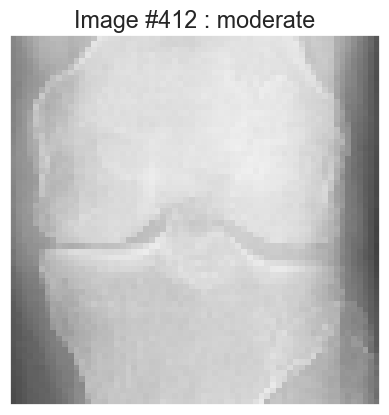

In [75]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability


index = np.random.randint(test_images.shape[0])
plt.figure()
plt.imshow(test_images[index])
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Image #{} : '.format(index) + class_names[pred_labels[index]])
plt.show()

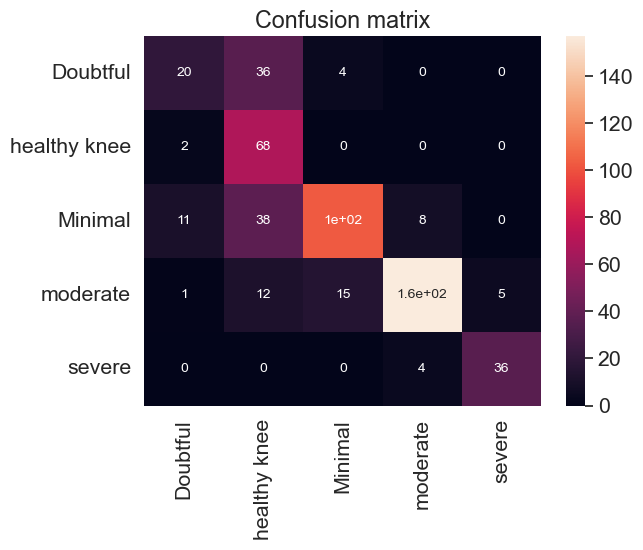

In [77]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True,
           annot_kws={"size": 10},
           xticklabels=class_names,
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [79]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

# Assuming CM is your confusion matrix, and you have class_names defined

# Calculate overall precision, recall, and F1 score
overall_precision = precision_score(test_labels, pred_labels, average='weighted')
overall_recall = recall_score(test_labels, pred_labels, average='weighted')
overall_f1 = f1_score(test_labels, pred_labels, average='weighted')

# Calculate custom accuracy
custom_accuracy = accuracy_score(test_labels, pred_labels)

print(f'Precision: {overall_precision}')
print(f'Recall: {overall_recall}')
print(f'F1 Score: {overall_f1}')
print(f'Custom Accuracy: {custom_accuracy}')

Precision: 0.7940692360161954
Recall: 0.7384615384615385
F1 Score: 0.7435591290085156
Custom Accuracy: 0.7384615384615385


In [81]:
# Generate and print classification report
print("\nClassification Report:")
print(classification_report(test_labels, pred_labels, target_names=class_names))


Classification Report:
              precision    recall  f1-score   support

    Doubtful       0.59      0.33      0.43        60
healthy knee       0.44      0.97      0.61        70
     Minimal       0.84      0.64      0.73       160
    moderate       0.93      0.83      0.87       190
      severe       0.88      0.90      0.89        40

    accuracy                           0.74       520
   macro avg       0.74      0.73      0.71       520
weighted avg       0.79      0.74      0.74       520



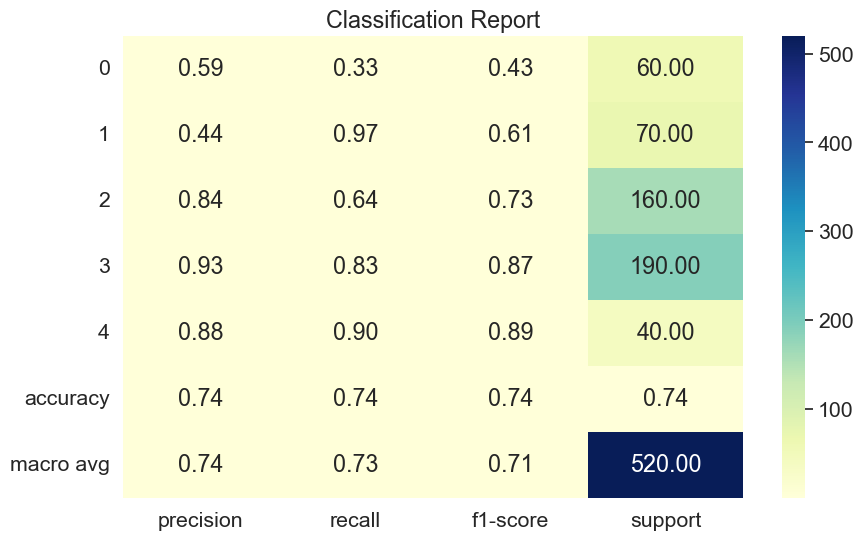

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Assuming test_labels and pred_labels are available

# Generate classification report
report = classification_report(test_labels, pred_labels, output_dict=True)

# Convert the classification report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].astype(float), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Classification Report')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


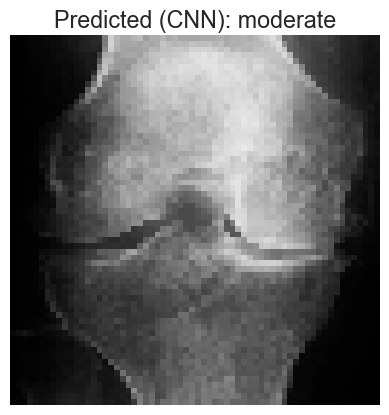

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6459 - loss: 0.8381
Model Accuracy: 73.85%


In [90]:
# Load and preprocess the image
from tensorflow.keras.preprocessing import image

image_path = "C:\\Users\\ABHISHEK\\Music\\bone cancer (1)\\bone cancer\\test\\moderate\\9053047R.png"
img = image.load_img(image_path, target_size=(64, 64))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict using `model`
pred_label = np.argmax(model.predict(img_array))

# Display results
plt.imshow(img)
plt.title(f"Predicted (CNN): {class_names[pred_label]}")
plt.axis("off")
plt.show()

# Model Accuracy
print(f"Model Accuracy: {model.evaluate(test_images, test_labels)[1] * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


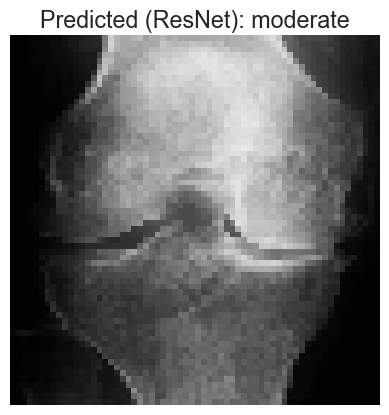

17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 339ms/step - accuracy: 0.7687 - loss: 0.8753
ResNet Model Accuracy: 75.58%


In [92]:
pred_label_resnet = np.argmax(model2.predict(img_array))

plt.imshow(img)
plt.title(f"Predicted (ResNet): {class_names[pred_label_resnet]}")
plt.axis("off")
plt.show()

print(f"ResNet Model Accuracy: {model2.evaluate(test_images, test_labels)[1] * 100:.2f}%")


C:\Users\ABHISHEK\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_587']. Received: the structure of inputs=*
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


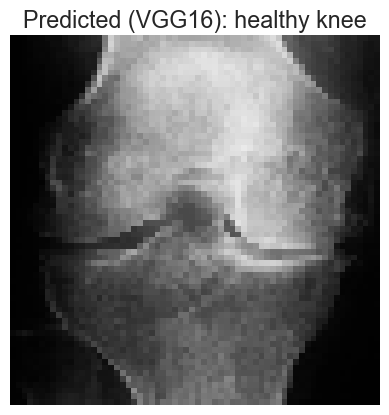

17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 247ms/step - accuracy: 0.2264 - loss: 1.4768
VGG16 Model Accuracy: 13.46%


In [94]:
pred_label_vgg = np.argmax(model3.predict(img_array))

plt.imshow(img)
plt.title(f"Predicted (VGG16): {class_names[pred_label_vgg]}")
plt.axis("off")
plt.show()

print(f"VGG16 Model Accuracy: {model3.evaluate(test_images, test_labels)[1] * 100:.2f}%")

# save the model

In [86]:
model.save_weights("model_dense.weights.h5")
print("Saved model to disk")

Saved model to disk


In [88]:
model_json=model.to_json()
with open("model_dense.json", "w") as json_file:
    json_file.write(model_json)

CNN-RESNET